In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [3]:
len_train,len_test=train_df.shape[0],test_df.shape[0]

In [4]:
data_df=pd.concat([train_df,test_df],ignore_index=True)

In [5]:
data_df.shape

(2919, 81)

In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            198 non-null object
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2837 non-null object
BsmtExposure     2837 non-null object
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtFinType1     2840 non-null object
BsmtFinType2     2839 non-null object
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2838 non-null object
BsmtUnfSF        2918 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2918 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      291

In [7]:
data_df.describe()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
count,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,2917.000000,2917.000000,2918.000000,2919.000000,...,2919.000000,2919.000000,1460.000000,2919.000000,2919.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1159.581706,336.483727,2.602261,2.860226,441.423235,49.582248,0.429894,0.061364,560.772104,23.098321,...,6.089072,2.251799,180921.195890,16.062350,6.451524,1051.777587,93.709832,1971.312778,1984.264474,2007.792737
std,392.362079,428.701456,25.188169,0.822693,455.610826,169.205611,0.524736,0.245687,439.543659,64.244246,...,1.409947,35.663946,79442.502883,56.184365,1.569379,440.766258,126.526589,30.291442,20.894344,1.314964
min,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,34900.000000,0.000000,2.000000,0.000000,0.000000,1872.000000,1950.000000,2006.000000
25%,876.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,220.000000,0.000000,...,5.000000,0.000000,129975.000000,0.000000,5.000000,793.000000,0.000000,1953.500000,1965.000000,2007.000000
50%,1082.000000,0.000000,0.000000,3.000000,368.500000,0.000000,0.000000,0.000000,467.000000,0.000000,...,6.000000,0.000000,163000.000000,0.000000,6.000000,989.500000,0.000000,1973.000000,1993.000000,2008.000000
75%,1387.500000,704.000000,0.000000,3.000000,733.000000,0.000000,1.000000,0.000000,805.500000,0.000000,...,7.000000,0.000000,214000.000000,0.000000,7.000000,1302.000000,168.000000,2001.000000,2004.000000,2009.000000
max,5095.000000,2065.000000,508.000000,8.000000,5644.000000,1526.000000,3.000000,2.000000,2336.000000,1012.000000,...,10.000000,800.000000,755000.000000,576.000000,15.000000,6110.000000,1424.000000,2010.000000,2010.000000,2010.000000


In [8]:
object_col=data_df.select_dtypes('object').columns
print("Columns with object datatypes {}".format(len(object_col)))
object_col

Columns with object datatypes 43


Index(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC',
       'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig',
       'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood',
       'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition',
       'SaleType', 'Street', 'Utilities'],
      dtype='object')

In [9]:
numeric_col=data_df.select_dtypes(['int16','int32','int64','float32','float64']).columns
print("Columns with numeric datatypes {}".format(len(numeric_col)))
numeric_col

Columns with numeric datatypes 38


Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'Id', 'KitchenAbvGr', 'LotArea',
       'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal',
       'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea',
       'SalePrice', 'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF',
       'YearBuilt', 'YearRemodAdd', 'YrSold'],
      dtype='object')

### Checking the distribution of target variable

In linear regression for better prediction target varaibale should be noramly distributed.
So we will transform the data into normal distribution.
To transform the data into normal distribution we will use log transformation.Beacuse log squeezes higher value.

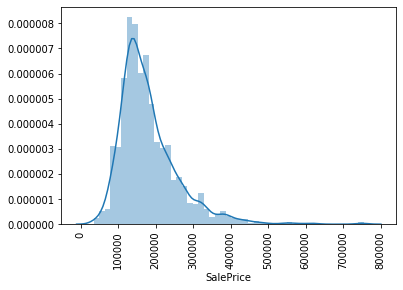

In [10]:
plt.xticks(rotation='90')
sns.distplot(data_df.SalePrice.iloc[:len_train]); # Data is skewed

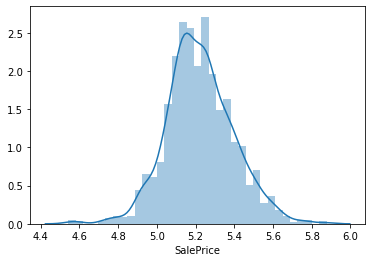

In [11]:
# Performing Log transformation on target varaible
data_df['SalePrice'].iloc[:len_train]=np.log10(data_df.SalePrice.iloc[:len_train])

#plotting the data
sns.distplot(data_df.SalePrice.iloc[:len_train]);

### Check columns with the missing value

In [12]:
train_na=pd.DataFrame()
train_na['na']=(data_df.isnull().sum()/len(data_df))*100
train_na=train_na[train_na['na']!=0].sort_values(by='na',ascending=False)

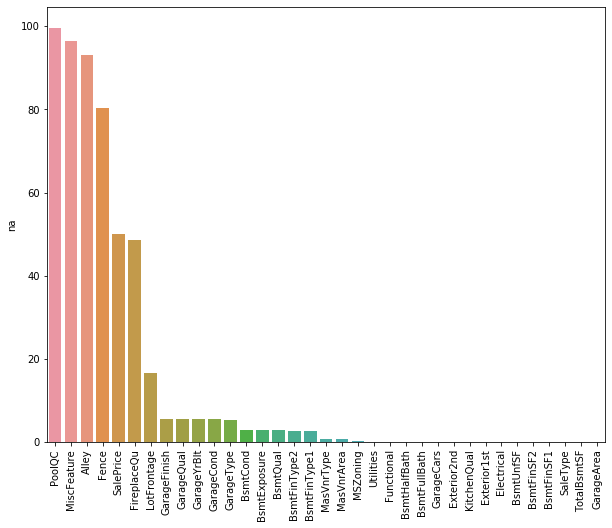

In [13]:
# Plotting the data
plt.figure(figsize=(10,8))

plt.xticks(rotation='90')

sns.barplot(x=train_na.index,y=train_na.na);

Fill na value for numeric and object columns

In [14]:
# Fill columns with datatype as 'object' with None

for object_col in data_df.columns:
    if (data_df[object_col].dtype=='O') & (data_df[object_col].isnull().any()):
        data_df[object_col]=data_df[object_col].fillna('None')

In [15]:
# Fill columns with datatype as 'numeric' with mean

numeric_dtypes=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
for numeric_col in data_df.columns:
    if (data_df[numeric_col].dtype in numeric_dtypes) & (data_df[numeric_col].isnull().any()):
        data_df[numeric_col]=data_df[numeric_col].fillna(data_df[numeric_col].mean())

In [16]:
data_df.isnull().any().value_counts() # Now all the na are filled

False    81
dtype: int64

For regression it is desirable that each feature are independent of each other
As in backend Regression uses matrix calculation.Each feature is vector in a matrix.
So it is necessary that every vector is independent of each other. Else matrix will not be invertible

In [17]:
# Total living area
data_df["TotalArea"]=data_df['TotalBsmtSF']+data_df['1stFlrSF']+data_df['2ndFlrSF']

# Total bathroom area
data_df["BathroomArea"]=data_df['FullBath']+data_df["HalfBath"]+data_df["BsmtFullBath"]+data_df["BsmtHalfBath"]

# Total Porsch area
data_df['TotalPorschArea']=data_df['OpenPorchSF']+data_df['3SsnPorch']+data_df['EnclosedPorch']+data_df['ScreenPorch']

In [18]:
# We can drop unneccessary repetative feature
data_df=data_df.drop(['OpenPorchSF','3SsnPorch','EnclosedPorch','ScreenPorch','FullBath','HalfBath','BsmtFullBath','BsmtHalfBath','TotalBsmtSF','1stFlrSF','2ndFlrSF'],axis=1)

### Feature Encoding

1. For Regression Categorical varaibale needs to be encoded
2. We will use one hot encoding techniques

In [19]:
df_final=pd.get_dummies(data_df).reset_index(drop=True)

### Modelling 

We Will model our data using lasso and Ridge regression 

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge,RidgeCV,Lasso,LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_squared_error

In [21]:
train=df_final[:len_train]
test=df_final[len_train:]

In [22]:
Y_train=train[['SalePrice']]
Y_test=test[['SalePrice']]

In [23]:
X_train=train.drop(['Id','SalePrice'],axis=1)
X_test=test.drop(['Id','SalePrice'],axis=1)

In [24]:
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, Y_train, scoring="neg_mean_squared_error", cv = 4))
    return(rmse)

In [25]:
model_ridge=Ridge()

In [26]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

Text(0, 0.5, 'rmse')

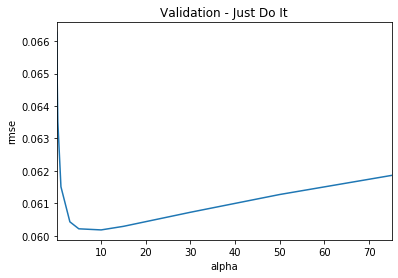

In [27]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [28]:
cv_ridge.min()

0.0601808253080032

In [31]:
model_Lasso=LassoCV(alphas=[0.001,0.005,0.1,0.5,1,5,10]).fit(X_train,Y_train)

In [32]:
rmse_cv(model_Lasso).mean()

0.06400078215987176

In [ ]:
# Ridge Gives us better accuracy then Lasso